# TEST

## COVID-19

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import datetime
from pandas_profiling import ProfileReport

In [2]:
Token= 'kwWGVZlNuVYFUheaHYiAxIsIRYCDEzvl'

In [3]:
#Import COVID dataset:
cov = pd.read_csv('time_series_covid19_confirmed_US.csv')

In [7]:
cov.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/3/21,12/4/21,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,5406,5406,5406,5417,5425,5433,5436,5437,5437,5437
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,4069,4069,4069,4073,4076,4080,4084,4091,4091,4091
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,1856,1856,1856,1858,1858,1858,1860,1863,1863,1863
3341,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,1197,1197,1197,1198,1203,1208,1211,1218,1218,1218


In [8]:
#Groupby states
cov_all_states = cov.groupby('Province_State').sum().reset_index()

In [9]:
#Select only relevant states
cov_state = cov_all_states[cov_all_states['Province_State'].isin(['Massachusetts', 'Connecticut', 'Maine', 'Vermont'])].reset_index(drop=True)

In [10]:
#Drop unnecessary columns and transpose
cov_state2 = cov_state.drop(columns=['UID', 'code3', 'FIPS', 'Lat', 'Long_']).T

In [11]:
# Check NaNs
is_NaN = cov_state2.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = cov_state2[row_has_NaN]
print(rows_with_NaN)

Empty DataFrame
Columns: [0, 1, 2, 3]
Index: []


In [12]:
#Replace Headers with first row
new_header = cov_state2.iloc[0] #grab the first row for the header
cov_state2 = cov_state2[1:] #take the data less the header row
cov_state2.columns = new_header #set the header row as the df header

In [13]:
#Reset index 
cov_state2.reset_index(inplace=True)

In [14]:
#Update column names in preparation for merge with weather dataset
cov_state3=cov_state2.rename(columns={'index': 'date','Connecticut': 'CT_conf_cases', 'Maine': 'ME_conf_cases', 'Vermont': 'VT_conf_cases', 'Massachusetts' : 'MA_conf_cases'})

In [15]:
#Remove index axis name
cov_state3.rename_axis('', axis=1, inplace=True)

In [16]:
#Convert date column to Datetime object
cov_state3['date']=pd.to_datetime(cov_state3['date'])

In [17]:
cov_state3.dtypes


date             datetime64[ns]
CT_conf_cases            object
ME_conf_cases            object
MA_conf_cases            object
VT_conf_cases            object
dtype: object

## Weather data

In [18]:
#create empty lists to store CT data
ct_dates_temp = []
ct_dates_prcp = []
ct_temps = []
ct_prcp = []

#for each year from 2020-2021 ...
for year in range(2020, 2022):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&datatypeid=PRCP&limit=1000&stationid=GHCND:USW00014740&startdate=2021-07-23&enddate=2021-12-01', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are average temperature readings
    ct_avg_temps = [item for item in d['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    ct_dates_temp += [item['date'] for item in ct_avg_temps]
    #get the actual average temperature from all average temperature readings
    ct_temps += [item['value'] for item in ct_avg_temps]
    #get all items in the response which are average precipitation readings
    ct_avg_prcp = [item for item in d['results'] if item['datatype']=='PRCP']
    #get the date field from all average precipitation readings
    ct_dates_prcp += [item['date'] for item in ct_avg_prcp]
    #get the actual average precipitation from all average precipitation readings
    ct_prcp += [item['value'] for item in ct_avg_prcp]

print('done')

working on year 2020
working on year 2021
done


In [19]:
ct_temps

[222,
 215,
 218,
 254,
 248,
 219,
 212,
 231,
 187,
 191,
 213,
 193,
 196,
 208,
 238,
 249,
 248,
 239,
 237,
 272,
 286,
 267,
 269,
 214,
 206,
 222,
 237,
 243,
 244,
 251,
 227,
 219,
 248,
 255,
 267,
 271,
 216,
 187,
 242,
 238,
 192,
 178,
 171,
 181,
 174,
 219,
 192,
 212,
 219,
 194,
 173,
 208,
 236,
 189,
 233,
 212,
 199,
 213,
 199,
 164,
 165,
 203,
 230,
 209,
 162,
 167,
 157,
 182,
 138,
 131,
 116,
 140,
 169,
 152,
 134,
 156,
 148,
 161,
 157,
 147,
 169,
 152,
 153,
 179,
 184,
 199,
 139,
 107,
 107,
 162,
 172,
 167,
 108,
 95,
 104,
 111,
 114,
 102,
 55,
 107,
 151,
 122,
 79,
 67,
 36,
 39,
 29,
 29,
 72,
 87,
 128,
 68,
 127,
 69,
 52,
 58,
 49,
 39,
 121,
 69,
 24,
 57,
 96,
 12,
 4,
 26,
 51,
 21,
 -4,
 9,
 -8,
 35,
 222,
 215,
 218,
 254,
 248,
 219,
 212,
 231,
 187,
 191,
 213,
 193,
 196,
 208,
 238,
 249,
 248,
 239,
 237,
 272,
 286,
 267,
 269,
 214,
 206,
 222,
 237,
 243,
 244,
 251,
 227,
 219,
 248,
 255,
 267,
 271,
 216,
 187,
 242,
 238,

In [20]:
#Note: avg temp not available for Maine, so will use temp min and temp max instead
me_dates_temp_min = []
me_dates_temp_max = []
me_dates_prcp = []
me_temps_min = []
me_temps_max = []
me_prcp = []

#for each year from 2020-2021 ...
for year in range(2020, 2022):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&&datatypeid=TMAX&datatypeid=TMIN&limit=1000&stationid=GHCND:USW00094626&startdate=2021-07-23&enddate=2021-12-01', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are MIN temp readings
    me_min_temps_item = [item for item in d['results'] if item['datatype']=='TMIN']
    #get the date field from all MIN temperature readings
    me_dates_temp_min += [item['date'] for item in me_min_temps_item]
    #get the actual min temperature from all MIN temperature readings
    me_temps_min += [item['value'] for item in me_min_temps_item]
    #get all items in the response which are MAX temperature readings
    me_max_temp_item = [item for item in d['results'] if item['datatype']=='TMAX']
    #get the date field from all MAX temperature readings
    me_dates_temp_max += [item['date'] for item in me_max_temp_item]
    #get the actual average temperature from all MAX temperature readings
    me_temps_max += [item['value'] for item in me_max_temp_item]
    #get all items in the response which are average PRCP readings
    me_avg_prcp = [item for item in d['results'] if item['datatype']=='PRCP']
    #get the date field from all average PRCP readings
    me_dates_prcp += [item['date'] for item in me_avg_prcp]
    #get the actual average precipitation from all average PRCP readings
    me_prcp += [item['value'] for item in me_avg_prcp]
    
print('done')
print('done')

working on year 2020
working on year 2021
done
done


In [21]:
#Create empty lists to store MA data
#Note: avg temp not available for Massachusetts, so will use temp min and temp max instead
ma_dates_temp_min = []
ma_dates_temp_max = []
ma_dates_prcp = []
ma_temps_min = []
ma_temps_max = []
ma_prcp = []

#for each year from 2020-2021 ...
for year in range(2020, 2022):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&&datatypeid=TMAX&datatypeid=TMIN&limit=1000&stationid=GHCND:USC00193624&startdate=2021-07-23&enddate=2021-12-01', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are MIN temp readings
    ma_min_temps_item = [item for item in d['results'] if item['datatype']=='TMIN']
    #get the date field from all MIN temperature readings
    ma_dates_temp_min += [item['date'] for item in ma_min_temps_item]
    #get the actual min temperature from all MIN temperature readings
    ma_temps_min += [item['value'] for item in ma_min_temps_item]
    #get all items in the response which are MAX temperature readings
    ma_max_temp_item = [item for item in d['results'] if item['datatype']=='TMAX']
    #get the date field from all MAX temperature readings
    ma_dates_temp_max += [item['date'] for item in ma_max_temp_item]
    #get the actual average temperature from all MAX temperature readings
    ma_temps_max += [item['value'] for item in ma_max_temp_item]
    #get all items in the response which are average PRCP readings
    ma_avg_prcp = [item for item in d['results'] if item['datatype']=='PRCP']
    #get the date field from all average PRCP readings
    ma_dates_prcp += [item['date'] for item in ma_avg_prcp]
    #get the actual average precipitation from all average PRCP readings
    ma_prcp += [item['value'] for item in ma_avg_prcp]
    
print('done')

working on year 2020
working on year 2021
done


In [22]:
ma_prcp

[43,
 0,
 23,
 0,
 69,
 114,
 0,
 43,
 0,
 0,
 0,
 0,
 18,
 859,
 5,
 0,
 0,
 147,
 157,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 145,
 3,
 0,
 175,
 3,
 318,
 0,
 0,
 0,
 0,
 20,
 0,
 0,
 41,
 950,
 0,
 0,
 3,
 0,
 0,
 0,
 81,
 76,
 0,
 0,
 8,
 0,
 0,
 89,
 0,
 10,
 81,
 0,
 0,
 0,
 0,
 3,
 249,
 259,
 0,
 76,
 10,
 3,
 0,
 0,
 0,
 229,
 224,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 221,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 145,
 335,
 409,
 13,
 0,
 239,
 157,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 259,
 46,
 0,
 20,
 0,
 0,
 0,
 84,
 0,
 0,
 76,
 0,
 0,
 0,
 13,
 5,
 0,
 0,
 0,
 0,
 43,
 0,
 23,
 0,
 69,
 114,
 0,
 43,
 0,
 0,
 0,
 0,
 18,
 859,
 5,
 0,
 0,
 147,
 157,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 145,
 3,
 0,
 175,
 3,
 318,
 0,
 0,
 0,
 0,
 20,
 0,
 0,
 41,
 950,
 0,
 0,
 3,
 0,
 0,
 0,
 81,
 76,
 0,
 0,
 8,
 0,
 0,
 89,
 0,
 10,
 81,
 0,
 0,
 0,
 0,
 3,
 249,
 259,
 0,
 76,
 10,
 3,
 0,
 0,
 0,
 229,
 224,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 221,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [23]:
#Create empty lists to store VT data
#Note: avg temp not available for Vermont, so will use temp min and temp max instead
vt_dates_temp_min = []
vt_dates_temp_max = []
vt_dates_prcp = []
vt_temps_min = []
vt_temps_max = []
vt_prcp = []

#for each year from 2020-2021 ...
for year in range(2020, 2022):
    year = str(year)
    print('working on year '+year)
    
    #make the api call
    r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&&datatypeid=TMAX&datatypeid=TMIN&limit=1000&stationid=GHCND:USW00014742&startdate=2021-07-23&enddate=2021-12-01', headers={'token':Token})
    #load the api response as a json
    d = json.loads(r.text)
    #get all items in the response which are MIN temp readings
    vt_min_temps_item = [item for item in d['results'] if item['datatype']=='TMIN']
    #get the date field from all MIN temperature readings
    vt_dates_temp_min += [item['date'] for item in vt_min_temps_item]
    #get the actual min temperature from all MIN temperature readings
    vt_temps_min += [item['value'] for item in vt_min_temps_item]
    #get all items in the response which are MAX temperature readings
    vt_max_temp_item = [item for item in d['results'] if item['datatype']=='TMAX']
    #get the date field from all MAX temperature readings
    vt_dates_temp_max += [item['date'] for item in vt_max_temp_item]
    #get the actual average temperature from all MAX temperature readings
    vt_temps_max += [item['value'] for item in vt_max_temp_item]
    #get all items in the response which are average PRCP readings
    vt_avg_prcp = [item for item in d['results'] if item['datatype']=='PRCP']
    #get the date field from all average PRCP readings
    vt_dates_prcp += [item['date'] for item in vt_avg_prcp]
    #get the actual average precipitation from all average PRCP readings
    vt_prcp += [item['value'] for item in vt_avg_prcp]
    
print('done')

working on year 2020
working on year 2021
done


### Connecticut

In [24]:
#Zip dates together with respective values per state:
#convert all date values to datetime objects:

#Connecticut:
df_ct_temps = pd.DataFrame(list(zip(ct_dates_temp, ct_temps)), columns = ['ct_date', 'ct_avg_temp'])
df_ct_temps['ct_date']=pd.to_datetime(df_ct_temps['ct_date'])
df_ct_prcp = pd.DataFrame(list(zip(ct_dates_prcp, ct_prcp)), columns = ['ct_date', 'ct_prcp'])
df_ct_prcp['ct_date']=pd.to_datetime(df_ct_prcp['ct_date'])

In [25]:
df_ct_temps

,ct_date,ct_avg_temp
0,2021-07-23,222
1,2021-07-24,215
2,2021-07-25,218
3,2021-07-26,254
4,2021-07-27,248
...,...,...
259,2021-11-27,21
260,2021-11-28,-4
261,2021-11-29,9
262,2021-11-30,-8


In [26]:
df_ct_prcp

,ct_date,ct_prcp
0,2021-07-23,0
1,2021-07-24,0
2,2021-07-25,41
3,2021-07-26,0
4,2021-07-27,20
...,...,...
259,2021-11-27,0
260,2021-11-28,0
261,2021-11-29,0
262,2021-11-30,0


In [27]:
ct_df = pd.merge(df_ct_prcp, df_ct_temps, how='left', on='ct_date')

In [28]:
ct_df.drop_duplicates(inplace=True)

In [29]:
DF_ct = ct_df

In [30]:
DF_ct

,ct_date,ct_prcp,ct_avg_temp
0,2021-07-23,0,222
2,2021-07-24,0,215
4,2021-07-25,41,218
6,2021-07-26,0,254
8,2021-07-27,20,248
...,...,...,...
254,2021-11-27,0,21
256,2021-11-28,0,-4
258,2021-11-29,0,9
260,2021-11-30,0,-8


In [ ]:
#Since we already have avg_temp for CT, inner join with prcp:
#DF_ct = pd.merge(df_ct_temps, df_ct_prcp, how='inner')

In [31]:
DF_ct.isna().sum()

ct_date        0
ct_prcp        0
ct_avg_temp    0
dtype: int64

### Maine

In [32]:
#Maine:
df_me_temp_min = pd.DataFrame(list(zip(me_dates_temp_min, me_temps_min)), columns = ['me_date', 'me_temp_min'])
df_me_temp_min['me_date'] = pd.to_datetime(df_me_temp_min['me_date'])
df_me_temp_max = pd.DataFrame(list(zip(me_dates_temp_max, me_temps_max)), columns = ['me_date', 'me_temp_max'])
df_me_temp_max['me_date'] = pd.to_datetime(df_me_temp_max['me_date'])
df_me_prcp = pd.DataFrame(list(zip(me_dates_prcp, me_prcp)), columns = ['me_date', 'me_prcp'])
df_me_prcp['me_date']=pd.to_datetime(df_me_prcp['me_date'])

In [33]:
#Merge min max ME temp dfs to compute avg_temp:
DF_me_temp_both = pd.merge(df_me_temp_max, df_me_temp_min, how = 'inner', on= ['me_date'])

In [34]:
#Create avg_temp column for Maine:
DF_me_temp_both['me_avg_temp'] = (DF_me_temp_both['me_temp_min'] + DF_me_temp_both['me_temp_max']) // 2
#Drop min max temp columns:
DF_me_temp_avg = DF_me_temp_both.drop(columns=['me_temp_max', 'me_temp_min'])

In [35]:
#Merge temp df with prcp df:
DF_me = pd.merge(DF_me_temp_avg, df_me_prcp, how = 'inner', on= ['me_date'])

In [36]:
DF_me =DF_me.drop_duplicates()

In [37]:
#Let's double check that the missing data made it into our Maine DataFrame (we'll just check a small portion):
DF_me.head()

,me_date,me_avg_temp,me_prcp
0,2021-07-23,172,8
8,2021-07-24,192,0
16,2021-07-25,153,36
24,2021-07-26,217,5
32,2021-07-27,178,0


### Vermont

In [38]:
#Vermont:
df_vt_temp_min = pd.DataFrame(list(zip(vt_dates_temp_min, vt_temps_min)), columns = ['vt_date', 'vt_temp_min'])
df_vt_temp_min['vt_date'] = pd.to_datetime(df_vt_temp_min['vt_date'])
df_vt_temp_max = pd.DataFrame(list(zip(vt_dates_temp_max, vt_temps_max)), columns = ['vt_date', 'vt_temp_max'])
df_vt_temp_max['vt_date'] = pd.to_datetime(df_vt_temp_max['vt_date'])
df_vt_prcp = pd.DataFrame(list(zip(vt_dates_prcp, vt_prcp)), columns = ['vt_date', 'vt_prcp'])
df_vt_prcp['vt_date']=pd.to_datetime(df_vt_prcp['vt_date'])

In [39]:
#Merge min max VT temp dfs to compute avg_temp:
DF_vt_temp_both = pd.merge(df_vt_temp_max, df_vt_temp_min, how = 'inner', on= ['vt_date'])

In [40]:
#Create avg_temp column for Vermont:
DF_vt_temp_both['vt_avg_temp'] = (DF_vt_temp_both['vt_temp_min'] + DF_vt_temp_both['vt_temp_max']) // 2
#Drop min max temp columns:
DF_vt_temp_avg = DF_vt_temp_both.drop(columns=['vt_temp_max', 'vt_temp_min'])

In [41]:
#Merge temp df with prcp df:
DF_vt = pd.merge(DF_vt_temp_avg, df_vt_prcp, how = 'inner', on= ['vt_date'])

In [42]:
DF_vt = DF_vt.drop_duplicates()

In [43]:
DF_vt

,vt_date,vt_avg_temp,vt_prcp
0,2021-07-23,208,0
8,2021-07-24,211,0
16,2021-07-25,241,58
24,2021-07-26,244,0
32,2021-07-27,205,56
...,...,...,...
1016,2021-11-27,-22,5
1024,2021-11-28,-58,0
1032,2021-11-29,-49,0
1040,2021-11-30,-44,5


### Massachusetts

In [44]:
#Massachusetts
df_ma_temp_min = pd.DataFrame(list(zip(ma_dates_temp_min, ma_temps_min)), columns = ['ma_date', 'ma_temp_min'])
df_ma_temp_min['ma_date'] = pd.to_datetime(df_ma_temp_min['ma_date'])
df_ma_temp_max = pd.DataFrame(list(zip(ma_dates_temp_max, ma_temps_max)), columns = ['ma_date', 'ma_temp_max'])
df_ma_temp_max['ma_date'] = pd.to_datetime(df_ma_temp_max['ma_date'])
df_ma_prcp = pd.DataFrame(list(zip(ma_dates_prcp, ma_prcp)), columns = ['ma_date', 'ma_prcp'])
df_ma_prcp['ma_date']=pd.to_datetime(df_ma_prcp['ma_date'])

In [45]:
#Merge min max MA temp dfs to compute avg_temp:
DF_ma_temp_both = pd.merge(df_ma_temp_max, df_ma_temp_min, how = 'inner', on= ['ma_date'])

In [46]:
#Create avg_temp column for Massachusetts:
DF_ma_temp_both['ma_avg_temp'] = (DF_ma_temp_both['ma_temp_min'] + DF_ma_temp_both['ma_temp_max']) // 2
#Drop min max temp columns:
DF_ma_temp_avg = DF_ma_temp_both.drop(columns=['ma_temp_max', 'ma_temp_min'])

In [47]:
#Merge MA temp df with MA prcp df:
DF_ma = pd.merge(DF_ma_temp_avg, df_ma_prcp, how = 'inner', on= ['ma_date'])

In [48]:
DF_ma = DF_ma.drop_duplicates()

In [49]:
DF_ma

,ma_date,ma_avg_temp,ma_prcp
0,2021-07-23,208,43
8,2021-07-24,194,0
16,2021-07-25,202,23
24,2021-07-26,253,0
32,2021-07-27,244,69
...,...,...,...
1008,2021-11-27,19,5
1016,2021-11-28,3,0
1024,2021-11-29,3,0
1032,2021-11-30,-6,0


### Weather merge to one dataframe

In [50]:
#Merge states to same df:
df_vt_me = pd.merge(DF_vt, DF_me, how = 'left', left_on= ['vt_date'], right_on= ['me_date'])
df_vt_me_ct= pd.merge(df_vt_me, DF_ct, how = 'left', left_on= ['vt_date'], right_on= ['ct_date'])
df_weather = pd.merge(df_vt_me_ct, DF_ma, how = 'left', left_on= ['vt_date'], right_on= ['ma_date'])

In [51]:
#Drop replicate 'date' columns:
df_weather2 = df_weather.drop(columns=['me_date', 'ct_date', 'ma_date'])
df_weather2

,vt_date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_prcp,ct_avg_temp,ma_avg_temp,ma_prcp
0,2021-07-23,208,0,172,8,0,222,208.0,43.0
1,2021-07-24,211,0,192,0,0,215,194.0,0.0
2,2021-07-25,241,58,153,36,41,218,202.0,23.0
3,2021-07-26,244,0,217,5,0,254,253.0,0.0
4,2021-07-27,205,56,178,0,20,248,244.0,69.0
...,...,...,...,...,...,...,...,...,...
127,2021-11-27,-22,5,-33,36,0,21,19.0,5.0
128,2021-11-28,-58,0,-58,0,0,-4,3.0,0.0
129,2021-11-29,-49,0,-52,0,0,9,3.0,0.0
130,2021-11-30,-44,5,-60,0,0,-8,-6.0,0.0


In [52]:
#Check for MA NaNs first, since MA has the most:
df_weather2.isna().sum()

vt_date        0
vt_avg_temp    0
vt_prcp        0
me_avg_temp    0
me_prcp        0
ct_prcp        0
ct_avg_temp    0
ma_avg_temp    1
ma_prcp        1
dtype: int64

In [53]:
#Check for MA NaNs first, since MA has the most:
df_weather2[df_weather2['ma_avg_temp'].isna()]

,vt_date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_prcp,ct_avg_temp,ma_avg_temp,ma_prcp
102,2021-11-02,64,13,47,0,0,79,NaN,NaN


In [54]:
#For MA, we need 2021-09-11:
r = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=PRCP&&datatypeid=TMAX&datatypeid=TMIN&limit=1000&stationid=GHCND:USC00194744&startdate=2021-11-02&enddate=2021-11-02', headers={'token':Token})
d = json.loads(r.text)
print(d)

{'metadata': {'resultset': {'offset': 1, 'count': 3, 'limit': 1000}}, 'results': [{'date': '2021-11-02T00:00:00', 'datatype': 'PRCP', 'station': 'GHCND:USC00194744', 'attributes': ',,H,0700', 'value': 0}, {'date': '2021-11-02T00:00:00', 'datatype': 'TMAX', 'station': 'GHCND:USC00194744', 'attributes': ',,H,0700', 'value': 139}, {'date': '2021-11-02T00:00:00', 'datatype': 'TMIN', 'station': 'GHCND:USC00194744', 'attributes': ',,H,0700', 'value': 0}]}


In [61]:
df_weather3= df_weather2.copy()

In [62]:
df_weather3.iloc[51, 7]

219.0

In [63]:
#Calculate TAVG:
ma_1102_tavg = (139 + 0)/2
#replace nan values from 2021-11-02
df_weather3.iloc[102,7] = ma_1102_tavg
df_weather3.iloc[102,8] = 0

In [64]:
df_weather3[df_weather3['ma_avg_temp'].isna()]

,vt_date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_prcp,ct_avg_temp,ma_avg_temp,ma_prcp


In [65]:
df_weather3.isna().sum()

vt_date        0
vt_avg_temp    0
vt_prcp        0
me_avg_temp    0
me_prcp        0
ct_prcp        0
ct_avg_temp    0
ma_avg_temp    0
ma_prcp        0
dtype: int64

### Merge all together

In [66]:
#Rename weather date column in preparation for merge
df_weather3=df_weather3.rename(columns={'vt_date':'date'})

In [67]:
df_weather3.isna().sum()

date           0
vt_avg_temp    0
vt_prcp        0
me_avg_temp    0
me_prcp        0
ct_prcp        0
ct_avg_temp    0
ma_avg_temp    0
ma_prcp        0
dtype: int64

In [68]:
weather2 = df_weather3.copy()

In [69]:
weather2.isna().sum()

date           0
vt_avg_temp    0
vt_prcp        0
me_avg_temp    0
me_prcp        0
ct_prcp        0
ct_avg_temp    0
ma_avg_temp    0
ma_prcp        0
dtype: int64

In [70]:
cov2 = cov_state3.copy()

In [71]:
cov_weather = pd.merge(weather2, cov2, how = 'inner', on= 'date')

In [72]:
cov_weather2 = cov_weather.reset_index(drop=True)

In [73]:
cov_weather2

,date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_prcp,ct_avg_temp,ma_avg_temp,ma_prcp,CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases
0,2021-07-23,208,0,172,8,0,222,208.0,43.0,352037,69835,715180,24676
1,2021-07-24,211,0,192,0,0,215,194.0,0.0,352037,69905,715180,24676
2,2021-07-25,241,58,153,36,41,218,202.0,23.0,352037,69905,715180,24676
3,2021-07-26,244,0,217,5,0,254,253.0,0.0,352626,69905,716452,24748
4,2021-07-27,205,56,178,0,20,248,244.0,69.0,353114,70077,717284,24760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,2021-11-27,-22,5,-33,36,0,21,19.0,5.0,418473,118489,909705,48120
128,2021-11-28,-58,0,-58,0,0,-4,3.0,0.0,418473,118489,909705,48120
129,2021-11-29,-49,0,-52,0,0,9,3.0,0.0,420785,118748,915495,49801
130,2021-11-30,-44,5,-60,0,0,-8,-6.0,0.0,421692,119662,919097,50014


In [74]:
#Any remaining missing values?
cov_weather2.isna().sum()

date             0
vt_avg_temp      0
vt_prcp          0
me_avg_temp      0
me_prcp          0
ct_prcp          0
ct_avg_temp      0
ma_avg_temp      0
ma_prcp          0
CT_conf_cases    0
ME_conf_cases    0
MA_conf_cases    0
VT_conf_cases    0
dtype: int64

In [75]:
cov_weather2[pd.isnull(cov_weather2).any(axis=1)]

,date,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_prcp,ct_avg_temp,ma_avg_temp,ma_prcp,CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases


In [76]:
# save the data to a new csv file
cov_weather2.to_csv('cov_weather_test.csv', index=False)

# EDA

In [77]:
import pandas as pd
import numpy as np 
import json
import requests
import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import geopandas as gpd
import seaborn as sns
import ppscore
from scipy import stats

In [78]:
# Load dataframe created in data wrangling phase
# Parse datetime column and make index
df= pd.read_csv('cov_weather_test.csv', parse_dates=['date'], index_col ='date')

In [79]:
# Check for duplicated DateTimeIndices
df[df.index.duplicated()]

,vt_avg_temp,vt_prcp,me_avg_temp,me_prcp,ct_prcp,ct_avg_temp,ma_avg_temp,ma_prcp,CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases
date,,,,,,,,,,,,


In [80]:
# Convert int columns to float in preparation for calculations:
int_columns= {"CT_conf_cases": 'float', "ME_conf_cases": 'float', "MA_conf_cases":"float", "VT_conf_cases":'float', "vt_avg_temp":'float', "vt_prcp":'float'}
df = df.astype(int_columns)

In [81]:
# (C*9/50)+32=F (since C is reported here as tenths of degrees)
df2=df.copy()
df2['vt_avg_temp'] = ((df['vt_avg_temp']*9)/50) + 32
df2['me_avg_temp'] = ((df['me_avg_temp']*9)/50) + 32
df2['ct_avg_temp'] = ((df['ct_avg_temp']*9)/50) + 32
df2['ma_avg_temp'] = ((df['ma_avg_temp']*9)/50) + 32

In [82]:
df3=df2.copy()
df3['vt_prcp'] = df2['vt_prcp']/10
df3['me_prcp'] = df2['me_prcp']/10
df3['ct_prcp'] = df2['ct_prcp']/10
df3['ma_prcp'] = df2['ma_prcp']/10

In [83]:
#Update column names to reflect new units:
units_dict= {'vt_avg_temp': 'VT_Avg_Temp(F)', 'vt_prcp': 'VT_PRCP(mm)', 'me_avg_temp':'ME_Avg_Temp(F)', 'me_prcp': 'ME_PRCP(mm)', 'ct_avg_temp': 'CT_Avg_Temp(F)', 'ct_prcp':'CT_PRCP(mm)', 'ma_avg_temp': 'MA_Avg_Temp(F)', 'ma_prcp':'MA_PRCP(mm)'}
df3.rename(columns=units_dict, inplace=True)
df3.head()

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases
date,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,352037.0,69835.0,715180.0,24676.0
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,352037.0,69905.0,715180.0,24676.0
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,352037.0,69905.0,715180.0,24676.0
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,352626.0,69905.0,716452.0,24748.0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,353114.0,70077.0,717284.0,24760.0


In [84]:
# Make copy of df 
df4=df3.copy()

In [85]:
# Make column of non-cumulative counts of confirmed cases for each state:
df4["CT_Conf_Cases"] = df4['CT_conf_cases'].diff().fillna(0)
df4["VT_Conf_Cases"] = df4['VT_conf_cases'].diff().fillna(0)
df4["ME_Conf_Cases"] = df4['ME_conf_cases'].diff().fillna(0)
df4["MA_Conf_Cases"] = df4['MA_conf_cases'].diff().fillna(0)

In [86]:
df4

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_conf_cases,ME_conf_cases,MA_conf_cases,VT_conf_cases,CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases
date,,,,,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,352037.0,69835.0,715180.0,24676.0,0.0,0.0,0.0,0.0
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,352037.0,69905.0,715180.0,24676.0,0.0,0.0,70.0,0.0
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,352037.0,69905.0,715180.0,24676.0,0.0,0.0,0.0,0.0
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,352626.0,69905.0,716452.0,24748.0,589.0,72.0,0.0,1272.0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,353114.0,70077.0,717284.0,24760.0,488.0,12.0,172.0,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,28.04,0.5,26.06,3.6,0.0,35.78,35.42,0.5,418473.0,118489.0,909705.0,48120.0,0.0,0.0,0.0,0.0
2021-11-28,21.56,0.0,21.56,0.0,0.0,31.28,32.54,0.0,418473.0,118489.0,909705.0,48120.0,0.0,0.0,0.0,0.0
2021-11-29,23.18,0.0,22.64,0.0,0.0,33.62,32.54,0.0,420785.0,118748.0,915495.0,49801.0,2312.0,1681.0,259.0,5790.0


In [94]:
# Drop cumulative confirmed case columns:
df5 = df4.drop(columns=['CT_conf_cases', 'VT_conf_cases', 'ME_conf_cases', 'MA_conf_cases'])

In [95]:
df5

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases
date,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,0.0,0.0,0.0,0.0
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,0.0,0.0,70.0,0.0
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,0.0,0.0,0.0,0.0
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,589.0,72.0,0.0,1272.0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,488.0,12.0,172.0,832.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,28.04,0.5,26.06,3.6,0.0,35.78,35.42,0.5,0.0,0.0,0.0,0.0
2021-11-28,21.56,0.0,21.56,0.0,0.0,31.28,32.54,0.0,0.0,0.0,0.0,0.0
2021-11-29,23.18,0.0,22.64,0.0,0.0,33.62,32.54,0.0,2312.0,1681.0,259.0,5790.0


In [96]:
CT_neg = df5[df5['CT_Conf_Cases']<0]
print("CT has", len(CT_neg), "negative case value(s):")
print(CT_neg.CT_Conf_Cases)

CT has 0 negative case value(s):
Series([], Name: CT_Conf_Cases, dtype: float64)


In [97]:
VT_neg = df5[df5['VT_Conf_Cases']<0]
print("VT has", len(VT_neg), "negative case value(s):")
print(VT_neg.VT_Conf_Cases)

VT has 0 negative case value(s):
Series([], Name: VT_Conf_Cases, dtype: float64)


In [98]:
ME_neg = df5[df5['ME_Conf_Cases']<0]
print("ME has", len(ME_neg), "negative case value(s):")
print(ME_neg.ME_Conf_Cases)

ME has 5 negative case value(s):
date
2021-08-09   -1.0
2021-10-10   -7.0
2021-10-12   -1.0
2021-10-18   -1.0
2021-11-15   -1.0
Name: ME_Conf_Cases, dtype: float64


In [99]:
MA_neg = df5[df5['MA_Conf_Cases']<0]
print("MA has", len(MA_neg), "negative case value(s):")
print(MA_neg.MA_Conf_Cases)

MA has 0 negative case value(s):
Series([], Name: MA_Conf_Cases, dtype: float64)


In [100]:
df5.ME_Conf_Cases[['2021-08-09', '2021-10-10','2021-10-12', '2021-10-18', '2021-11-15']]= np.nan

In [101]:
# Loop through NaNs and fill with average of previous and following cell values 
state_col_list=['CT_Conf_Cases', 'VT_Conf_Cases', 'ME_Conf_Cases', 'MA_Conf_Cases']
for col in state_col_list:
    df5[col] = df5[col].fillna((df5[col].shift() + df5[col].shift(-1))/2)

In [102]:
ME_neg = df5[df5['ME_Conf_Cases']<0]
print("ME has", len(ME_neg), "negative case value(s):")
print(ME_neg.ME_Conf_Cases)

ME has 0 negative case value(s):
Series([], Name: ME_Conf_Cases, dtype: float64)


In [103]:
df6 = df5.copy()
# Add a weekday column
df6["weekday"] = df6.index.dayofweek

In [104]:
df6

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday
date,,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,0.0,0.0,0.0,0.0,4
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,0.0,0.0,70.0,0.0,5
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,0.0,0.0,0.0,0.0,6
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,589.0,72.0,0.0,1272.0,0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,488.0,12.0,172.0,832.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,28.04,0.5,26.06,3.6,0.0,35.78,35.42,0.5,0.0,0.0,0.0,0.0,5
2021-11-28,21.56,0.0,21.56,0.0,0.0,31.28,32.54,0.0,0.0,0.0,0.0,0.0,6
2021-11-29,23.18,0.0,22.64,0.0,0.0,33.62,32.54,0.0,2312.0,1681.0,259.0,5790.0,0


In [105]:
# Define a function to highlight zero values (which may be indicative of missing values)
def highlight_zero(cell):
    if cell == 0:
        return 'background: yellow'  

In [106]:
# Compare all states' missing value patterns
(pd.DataFrame(df6[['CT_Conf_Cases', 'MA_Conf_Cases', 'ME_Conf_Cases', 
                            'VT_Conf_Cases', 'weekday']].tail(25)).style.applymap(highlight_zero))

,CT_Conf_Cases,MA_Conf_Cases,ME_Conf_Cases,VT_Conf_Cases,weekday
date,,,,,
2021-11-07 00:00:00,0.000000,0.000000,0.000000,405.000000,6
2021-11-08 00:00:00,941.000000,4326.000000,0.000000,234.000000,0
2021-11-09 00:00:00,309.000000,1539.000000,938.000000,169.000000,1
2021-11-10 00:00:00,533.000000,1948.000000,882.000000,194.000000,2
2021-11-11 00:00:00,540.000000,0.000000,755.000000,611.000000,3
2021-11-12 00:00:00,458.000000,3988.000000,0.000000,509.000000,4
2021-11-13 00:00:00,0.000000,0.000000,798.000000,460.000000,5
2021-11-14 00:00:00,0.000000,0.000000,0.000000,311.000000,6
2021-11-15 00:00:00,2179.000000,5846.000000,473.000000,223.000000,0


In [107]:
df7 = df6.copy()
sunday_ind_me=(df7[(df7.weekday == 6)&(df7.ME_Conf_Cases==0)& (df7.index >'2020-01-29')]).index # Sunday zero values
monday_ind_me=(df7[(df7.weekday == 0)&(df7.ME_Conf_Cases==0)&(df7.index>'2020-01-29')]).index # Monday zero values
# Zero values that are neither Sunday nor Monday
other_ind_me=(df7[(df7.weekday != 0)& (df7.weekday != 6)&(df7.ME_Conf_Cases==0)& (df7.index >'2020-01-29')]).index  

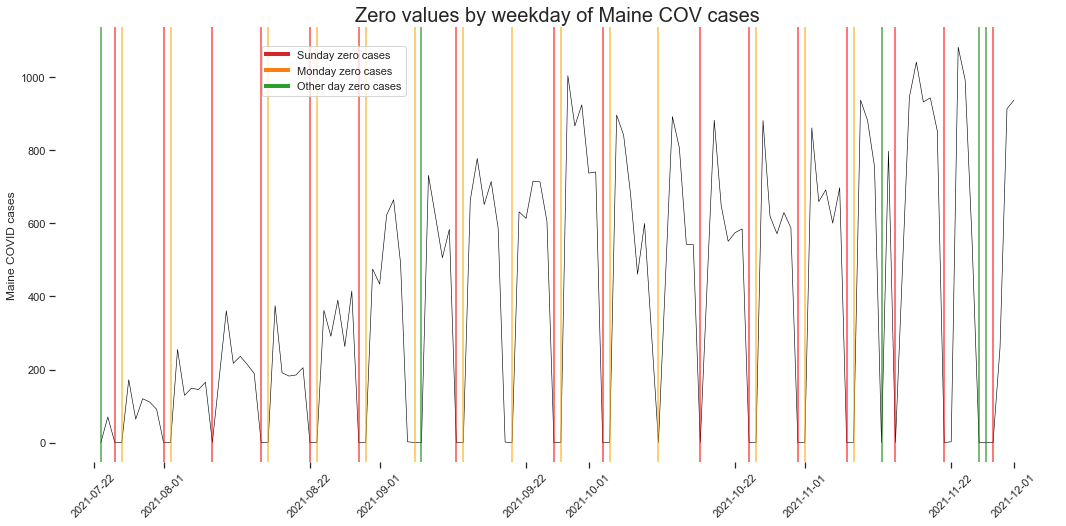

In [108]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Monday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

sns.set(rc={'figure.figsize':(18,8)})
with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df7.index, df7['ME_Conf_Cases'], color = 'black', linewidth=0.6)
    ax.set_ylabel('Maine COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_me:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in monday_ind_me:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_me:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Maine COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.2,0.97))
    plt.show()

In [109]:
sunday_ind_ma=(df7[(df7.weekday == 6)&(df7.MA_Conf_Cases==0)& (df7.index >'2020-01-29')]).index # Sunday zero values
saturday_ind_ma=(df7[(df7.weekday == 5)&(df7.MA_Conf_Cases==0)&(df7.index>'2020-01-29')]).index # Saturday zero values
# Zero values that are neither Sunday nor Monday
other_ind_ma=(df7[(df7.weekday != 5)& (df7.weekday != 6)&(df7.MA_Conf_Cases==0)& (df7.index >'2020-01-29')]).index 

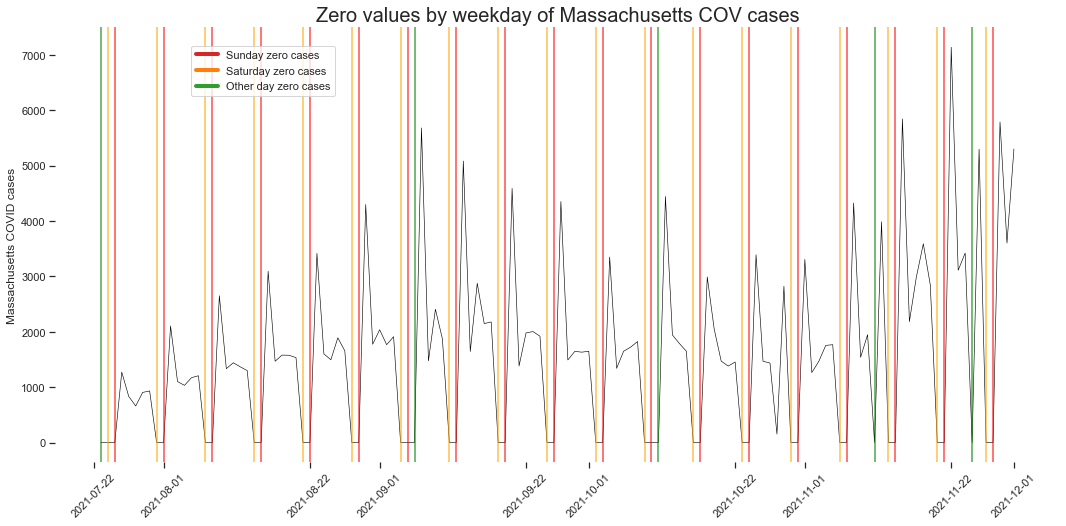

In [110]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Saturday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df7.index, df7['MA_Conf_Cases'], color = 'black', linewidth=0.6)
    ax.set_ylabel('Massachusetts COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_ma:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in saturday_ind_ma:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_ma:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Massachusetts COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0.13,0.97))
    plt.show()

In [111]:
sunday_ind_ct=(df7[(df7.weekday == 6)&(df7.CT_Conf_Cases==0)& (df7.index >'2020-01-29')]).index # Sunday zero values
saturday_ind_ct=(df7[(df7.weekday == 5)&(df7.CT_Conf_Cases==0)&(df7.index>'2020-01-29')]).index # Saturday zero values
# Zero values that are neither Sunday nor Monday
other_ind_ct=(df7[(df7.weekday != 5)& (df7.weekday != 6)&(df7.CT_Conf_Cases==0)& (df7.index >'2020-01-29')]).index 

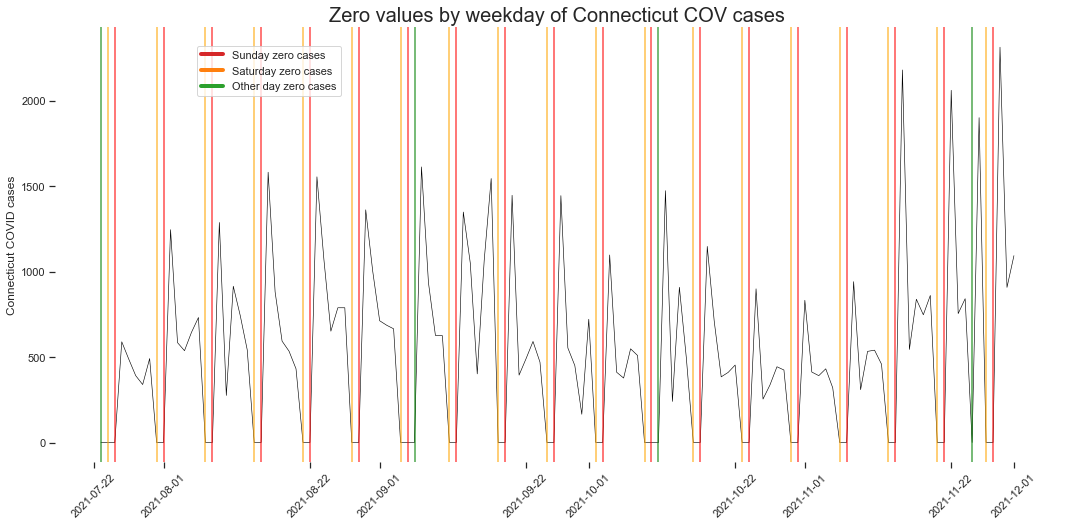

In [112]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Saturday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df7.index, df7['CT_Conf_Cases'],  color = 'black', linewidth=0.6)
    ax.set_ylabel('Connecticut COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_ct:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in saturday_ind_ct:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_ct:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Connecticut COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.29, 0.97))
    plt.show()

In [113]:
sunday_ind_vt=(df7[(df7.weekday == 6)&(df7.VT_Conf_Cases==0)& (df7.index >'2020-01-29')]).index # Sunday zero values
saturday_ind_vt=(df7[(df7.weekday == 5)&(df7.VT_Conf_Cases==0)&(df7.index>'2020-01-29')]).index # Saturday zero values
# Zero values that are neither Sunday nor Monday
other_ind_vt=(df7[(df7.weekday != 5)& (df7.weekday != 6)&(df7.VT_Conf_Cases==0)& (df7.index >'2020-01-29')]).index 

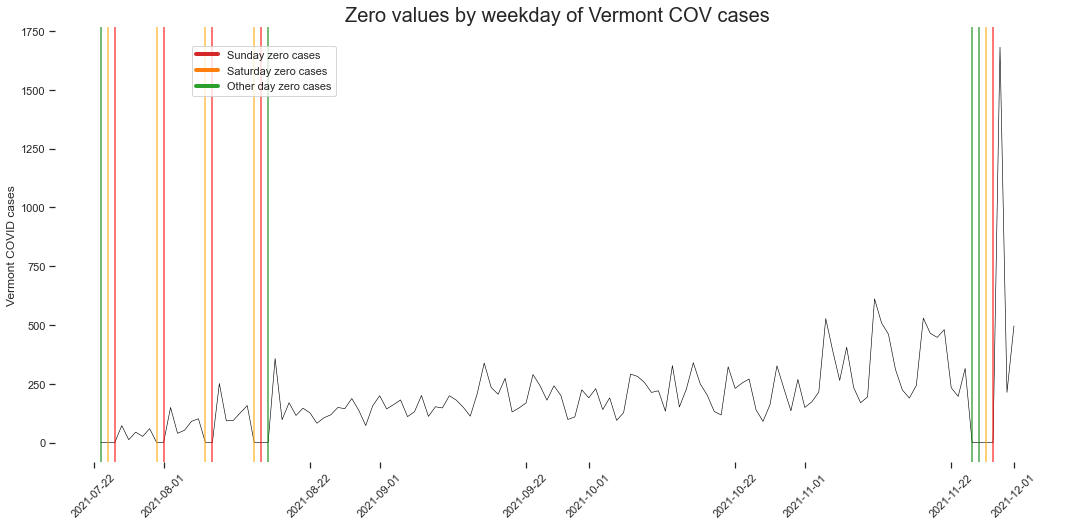

In [114]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Saturday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df7.index, df7['VT_Conf_Cases'],  color = 'black', linewidth=0.6)
    ax.set_ylabel('Vermont COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_vt:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in saturday_ind_vt:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_vt:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Vermont COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.285, 0.97))
    plt.show()

In [115]:
df9=df7.copy()

In [116]:
df9['ME_third'] = round(df9['ME_Conf_Cases']/3)

In [117]:
me_lags = {'me_lag_1': -1, 'me_lag_2': -2, 'me_lag_3': -3}
for key, value in me_lags.items():
    df9[key] = df9['ME_third'].shift(value, axis=0)

In [118]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==1) & (row['ME_Conf_Cases'] != 0):
        df9.at[index, 'ME_Conf_Cases'] = df9.at[index, 'ME_third']

In [119]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==0) & (row['ME_Conf_Cases'] == 0):
        df9.at[index, 'ME_Conf_Cases'] = df9.at[index, 'me_lag_1']

In [120]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==6) & (row['ME_Conf_Cases'] == 0):
        df9.at[index, 'ME_Conf_Cases'] = df9.at[index, 'me_lag_2']

In [121]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==2) & (row['ME_Conf_Cases'] != 0):
        df9.at[index, 'ME_Conf_Cases'] = df9.at[index, 'ME_third']

In [122]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==1) & (row['ME_Conf_Cases'] == 0):
        df9.at[index, 'ME_Conf_Cases'] = df9.at[index, 'me_lag_1']

In [123]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==0) & (row['ME_Conf_Cases'] == 0):
        df9.at[index, 'ME_Conf_Cases'] = df9.at[index, 'me_lag_2']

In [124]:
sunday_ind_me=(df9[(df9.weekday == 6)&(df9.ME_Conf_Cases==0)]).index # Sunday zero values
monday_ind_me=(df9[(df9.weekday == 0)&(df9.ME_Conf_Cases==0)]).index # Monday zero values
# Zero values that are neither Sunday nor Monday
other_ind_me=(df9[(df9.weekday != 0)& (df9.weekday != 6)&(df9.ME_Conf_Cases==0)]).index

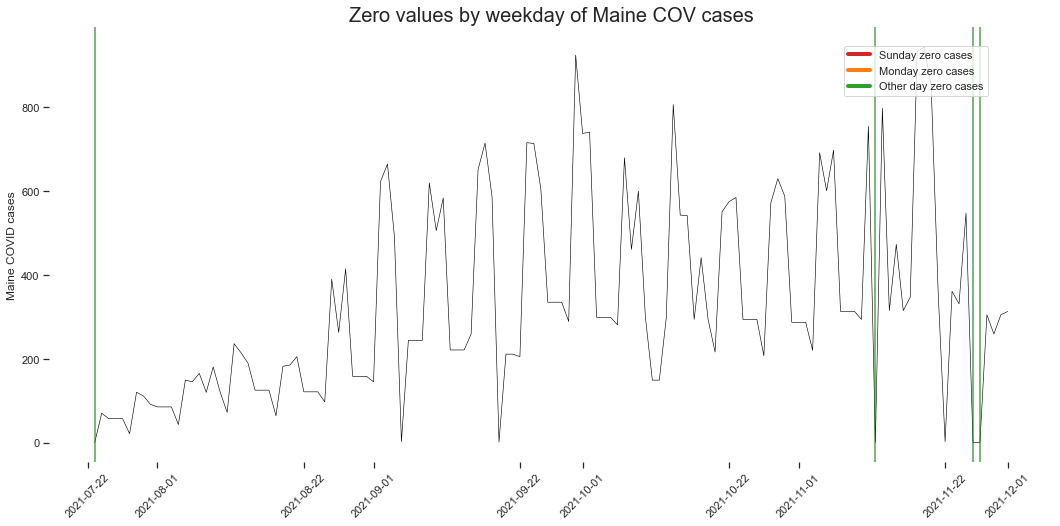

In [125]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Monday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

sns.set(rc={'figure.figsize':(18,8)})
with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df9.index, df9['ME_Conf_Cases'], color = 'black', linewidth=0.6)
    ax.set_ylabel('Maine COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_me:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in monday_ind_me:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_me:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Maine COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.94, 0.97))
    plt.show()

### CT

In [126]:
# Get rid of Maine-specific columns
df9 = df9.drop(['ME_third', 'me_lag_1', 'me_lag_2', 'me_lag_3'], axis=1)

In [127]:
# Create Connecticut-specific columns
# CT_third
df9['CT_third'] = round(df9['CT_Conf_Cases']/3)

In [128]:
# ct_lags
ct_lags = {'ct_lag_1': -1, 'ct_lag_2': -2, 'ct_lag_3': -3}
for key, value in ct_lags.items():
    df9[key] = df9['CT_third'].shift(value, axis=0)

In [129]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==0) & (row['CT_Conf_Cases'] != 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'CT_third']

In [130]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==6) & (row['CT_Conf_Cases'] == 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'ct_lag_1']

In [131]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==5) & (row['CT_Conf_Cases'] == 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'ct_lag_2']

In [132]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==1) & (row['CT_Conf_Cases'] != 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'CT_third']

In [133]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==0) & (row['CT_Conf_Cases'] == 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'ct_lag_1']

In [134]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==6) & (row['CT_Conf_Cases'] == 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'ct_lag_2']

In [135]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2020-07-01')) & (row['weekday']==5) & (row['CT_Conf_Cases'] == 0):
        df9.at[index, 'CT_Conf_Cases'] = df9.at[index, 'ct_lag_3']

In [136]:
sunday_ind_ct=(df9[(df9.weekday == 6)&(df9.CT_Conf_Cases==0)]).index # Sunday zero values
saturday_ind_ct=(df9[(df9.weekday == 5)&(df9.CT_Conf_Cases==0)]).index # Saturday zero values
# Zero values that are neither Sunday nor Monday
other_ind_ct=(df9[(df9.weekday != 5)& (df9.weekday != 6)&(df9.CT_Conf_Cases==0)]).index 

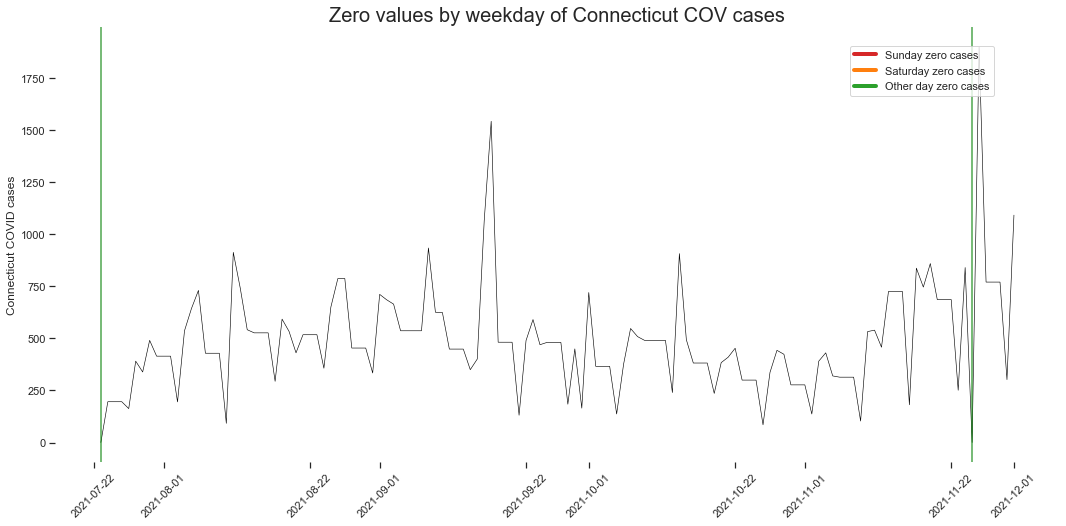

In [137]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Saturday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df9.index, df9['CT_Conf_Cases'], color = 'black', linewidth=0.6)
    ax.set_ylabel('Connecticut COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_ct:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in saturday_ind_ct:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_ct:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Connecticut COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.94, 0.97))
    plt.show()

### VT

In [138]:
# Get rid of Connecticut-specific columns
df9 = df9.drop(['CT_third', 'ct_lag_1', 'ct_lag_2', 'ct_lag_3'], axis=1)

In [139]:
# Create Vermont-specific columns
# VT_third
df9['VT_third'] = round(df9['VT_Conf_Cases']/3)

In [140]:
# vt_lags
vt_lags = {'vt_lag_1': -1, 'vt_lag_2': -2, 'vt_lag_3': -3}
for key, value in vt_lags.items():
    df9[key] = df9['VT_third'].shift(value, axis=0)

In [141]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24')) & (row['weekday']==0) & (row['VT_Conf_Cases'] != 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'VT_third']

In [142]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24'))& (row['weekday']==6) & (row['VT_Conf_Cases'] == 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'vt_lag_1']

In [143]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24')) & (row['weekday']==5) & (row['VT_Conf_Cases'] == 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'vt_lag_2']

In [144]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24')) & (row['weekday']==1) & (row['VT_Conf_Cases'] != 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'VT_third']

In [145]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24')) & (row['weekday']==0) & (row['VT_Conf_Cases'] == 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'vt_lag_1']

In [146]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24')) & (row['weekday']==6) & (row['VT_Conf_Cases'] == 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'vt_lag_2']

In [147]:
for index, row in df9.iterrows():
    if (index >=pd.Timestamp('2021-06-01')) & (index <=pd.Timestamp('2021-08-24')) & (row['weekday']==5) & (row['VT_Conf_Cases'] == 0):
        df9.at[index, 'VT_Conf_Cases'] = df9.at[index, 'vt_lag_3']

In [148]:
sunday_ind_vt=(df9[(df9.weekday == 6)&(df9.VT_Conf_Cases==0)]).index # Sunday zero values
saturday_ind_vt=(df9[(df9.weekday == 5)&(df9.VT_Conf_Cases==0)]).index # Saturday zero values
# Zero values that are neither Sunday nor Monday
other_ind_vt=(df9[(df9.weekday != 5)& (df9.weekday != 6)&(df9.VT_Conf_Cases==0)]).index

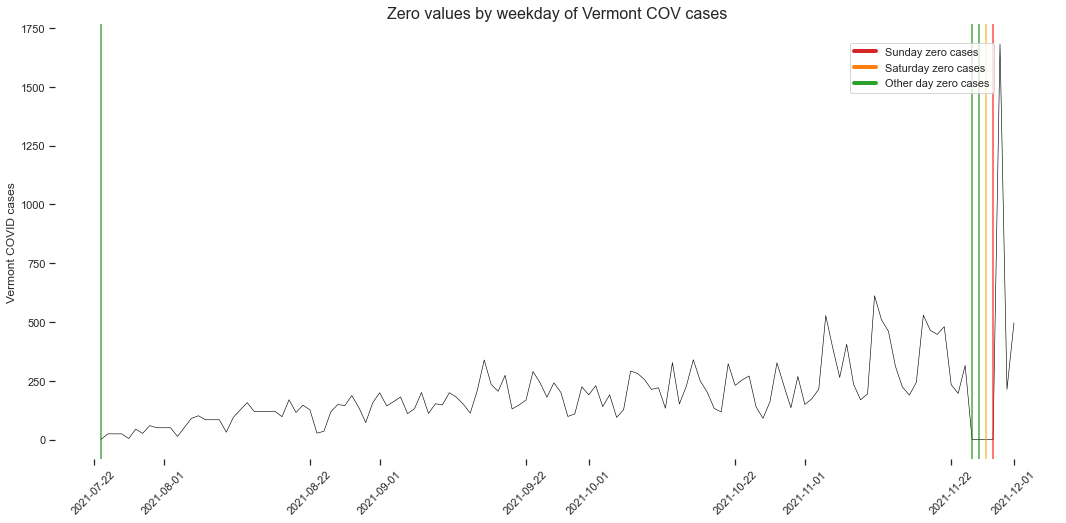

In [149]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Saturday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df9.index, df9['VT_Conf_Cases'], color = 'black', linewidth=0.6)
    ax.set_ylabel('Vermont COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_vt:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in saturday_ind_vt:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_vt:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Vermont COV cases', fontsize=16)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.94, 0.97))
    plt.show()

## MA

In [150]:
df9

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday,VT_third,vt_lag_1,vt_lag_2,vt_lag_3
date,,,,,,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,24.0
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,196.0,24.0,70.0,0.0,5,0.0,0.0,24.0,4.0
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,196.0,24.0,57.0,0.0,6,0.0,24.0,4.0,15.0
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,196.0,24.0,57.0,1272.0,0,24.0,4.0,15.0,9.0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,163.0,4.0,57.0,832.0,1,4.0,15.0,9.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,28.04,0.5,26.06,3.6,0.0,35.78,35.42,0.5,771.0,0.0,0.0,0.0,5,0.0,0.0,560.0,71.0
2021-11-28,21.56,0.0,21.56,0.0,0.0,31.28,32.54,0.0,771.0,0.0,305.0,0.0,6,0.0,560.0,71.0,165.0
2021-11-29,23.18,0.0,22.64,0.0,0.0,33.62,32.54,0.0,771.0,1681.0,259.0,5790.0,0,560.0,71.0,165.0,NaN


In [151]:
# Get rid of Vermont-specific columns
df9 = df9.drop('VT_third', axis=1)

In [152]:
df9

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday,vt_lag_1,vt_lag_2,vt_lag_3
date,,,,,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,0.0,0.0,0.0,0.0,4,0.0,0.0,24.0
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,196.0,24.0,70.0,0.0,5,0.0,24.0,4.0
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,196.0,24.0,57.0,0.0,6,24.0,4.0,15.0
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,196.0,24.0,57.0,1272.0,0,4.0,15.0,9.0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,163.0,4.0,57.0,832.0,1,15.0,9.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,28.04,0.5,26.06,3.6,0.0,35.78,35.42,0.5,771.0,0.0,0.0,0.0,5,0.0,560.0,71.0
2021-11-28,21.56,0.0,21.56,0.0,0.0,31.28,32.54,0.0,771.0,0.0,305.0,0.0,6,560.0,71.0,165.0
2021-11-29,23.18,0.0,22.64,0.0,0.0,33.62,32.54,0.0,771.0,1681.0,259.0,5790.0,0,71.0,165.0,NaN


In [153]:
# Create Massachusetts-specific columns
# MA_third
df9['MA_third'] = round(df9['MA_Conf_Cases']/3)

In [154]:
# ma_lags
ma_lags = {'ma_lag_1': -1, 'ma_lag_2': -2, 'ma_lag_3': -3}
for key, value in ma_lags.items():
    df9[key] = df9['MA_third'].shift(value, axis=0)

In [155]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==0) & (row['MA_Conf_Cases'] != 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'MA_third']

In [156]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==6) & (row['MA_Conf_Cases'] == 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'ma_lag_1']

In [157]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==5) & (row['MA_Conf_Cases'] == 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'ma_lag_2']

In [158]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==1) & (row['MA_Conf_Cases'] != 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'MA_third']

In [159]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==0) & (row['MA_Conf_Cases'] == 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'ma_lag_1']

In [160]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==6) & (row['MA_Conf_Cases'] == 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'ma_lag_2']

In [161]:
for index, row in df9.iterrows():
    if (index>= pd.Timestamp('2021-07-01')) & (row['weekday']==5) & (row['MA_Conf_Cases'] == 0):
        df9.at[index, 'MA_Conf_Cases'] = df9.at[index, 'ma_lag_3']

In [162]:
sunday_ind_ma=(df9[(df9.weekday == 6)&(df9.MA_Conf_Cases==0)]).index # Sunday zero values
saturday_ind_ma=(df9[(df9.weekday == 5)&(df9.MA_Conf_Cases==0)]).index # Saturday zero values
# Zero values that are neither Sunday nor Monday
other_ind_ma=(df9[(df9.weekday != 5)& (df9.weekday != 6)&(df9.MA_Conf_Cases==0)]).index 

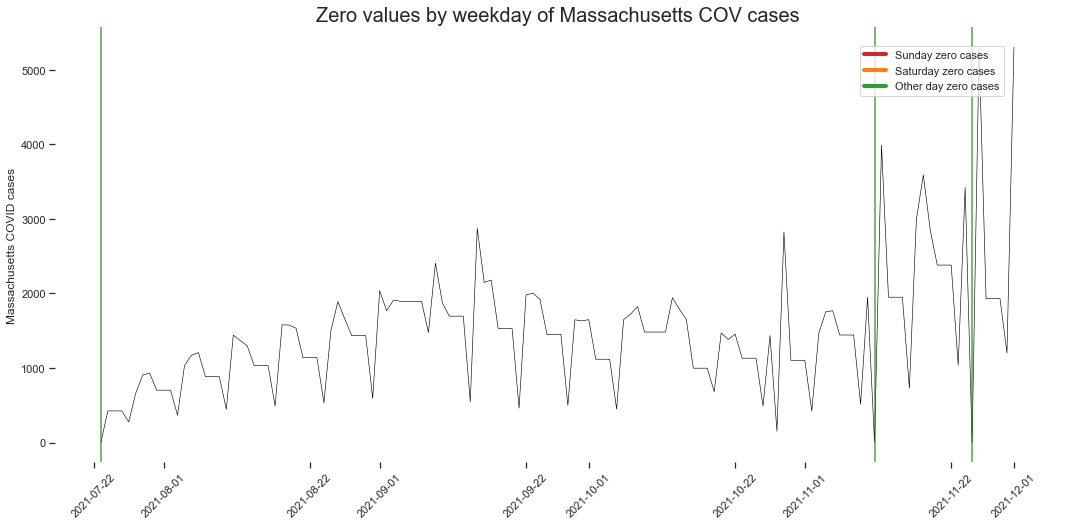

In [163]:
legend_elements = [Line2D([0], [0], color='tab:red', lw=4, label='Sunday zero cases'),
                   Line2D([0], [0], color='tab:orange', lw=4, label='Saturday zero cases'),
                   Line2D([0], [0], color='tab:green', lw=4, label='Other day zero cases')]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    plt.plot(df9.index, df9['MA_Conf_Cases'], color = 'black', linewidth=0.6)
    ax.set_ylabel('Massachusetts COVID cases')
    plt.xticks(rotation=45)
    for i in sunday_ind_ma:    
        ax.axvline(x=i, color='red', alpha=0.7)
    for i in saturday_ind_ma:    
        ax.axvline(x=i, color='orange', alpha=0.7)
    for i in other_ind_ma:    
        ax.axvline(x=i, color='green', alpha=0.7)
    plt.title('Zero values by weekday of Massachusetts COV cases', fontsize=20)
    sns.despine(left=True, bottom=True)
    ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.95, 0.97))
    plt.show()

In [164]:
# Get rid of Massachusetts-specific columns
df9 = df9.drop(['MA_third', 'ma_lag_1', 'ma_lag_2', 'ma_lag_3'], axis=1)

In [166]:
# Get rid of Massachusetts-specific columns
df9 = df9.drop(['vt_lag_1', 'vt_lag_2', 'vt_lag_3'], axis=1)

In [167]:
df9.isna().sum()

VT_Avg_Temp(F)    0
VT_PRCP(mm)       0
ME_Avg_Temp(F)    0
ME_PRCP(mm)       0
CT_PRCP(mm)       0
CT_Avg_Temp(F)    0
MA_Avg_Temp(F)    0
MA_PRCP(mm)       0
CT_Conf_Cases     0
VT_Conf_Cases     0
ME_Conf_Cases     0
MA_Conf_Cases     0
weekday           0
dtype: int64

# PREPROCESSING

In [168]:
df = df9.copy()

In [169]:
df

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_PRCP(mm),CT_Avg_Temp(F),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday
date,,,,,,,,,,,,,
2021-07-23,69.44,0.0,62.96,0.8,0.0,71.96,69.44,4.3,0.0,0.0,0.0,0.0,4
2021-07-24,69.98,0.0,66.56,0.0,0.0,70.70,66.92,0.0,196.0,24.0,70.0,424.0,5
2021-07-25,75.38,5.8,59.54,3.6,4.1,71.24,68.36,2.3,196.0,24.0,57.0,424.0,6
2021-07-26,75.92,0.0,71.06,0.5,0.0,77.72,77.54,0.0,196.0,24.0,57.0,424.0,0
2021-07-27,68.90,5.6,64.04,0.0,2.0,76.64,75.92,6.9,163.0,4.0,57.0,277.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-27,28.04,0.5,26.06,3.6,0.0,35.78,35.42,0.5,771.0,0.0,0.0,1930.0,5
2021-11-28,21.56,0.0,21.56,0.0,0.0,31.28,32.54,0.0,771.0,0.0,305.0,1930.0,6
2021-11-29,23.18,0.0,22.64,0.0,0.0,33.62,32.54,0.0,771.0,1681.0,259.0,1930.0,0


In [170]:
df_vt=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [171]:
df_me=df.drop(columns=['VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [172]:
df_ma=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases','weekday'])

In [173]:
df_ct= df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [174]:
# Make duplicates of datasets for processing with Pycaret:
df_vt3 = df_vt.reset_index()
df_ct3 = df_ct.reset_index()
df_me3 = df_me.reset_index()
df_ma3 = df_ma.reset_index()

In [175]:
df_list = [df_ct3, df_ma3, df_me3, df_vt3]

In [176]:
# Add 'day_of_week' and 'day_of_year' columns to each dataframe
for df in df_list:
    df['day_of_week'] = [i.dayofweek for i in df['date']]
    df['day_of_year'] = [i.dayofyear for i in df['date']]
    df['Year'] =[i.year for i in df['date']]
    df['Month'] = [i.month for i in df['date']]
    df['Day'] = [i.day for i in df['date']]

In [177]:
df_ma3['new_case_percent_pop*'] = (df_ma3['MA_Conf_Cases'] / 70.29917)

In [178]:
df_ct3['new_case_percent_pop*'] = (df_ct3['CT_Conf_Cases'] / 36.05944)

In [179]:
df_me3['new_case_percent_pop*'] = (df_me3['ME_Conf_Cases'] / 13.62359)

In [180]:
df_vt3['new_case_percent_pop*'] = (df_vt3['VT_Conf_Cases'] / 6.43077)

#### Lagged precip

In [181]:
df_ma3

,date,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases,day_of_week,day_of_year,Year,Month,Day,new_case_percent_pop*
0,2021-07-23,69.44,4.3,0.0,4,204,2021,7,23,0.000000
1,2021-07-24,66.92,0.0,424.0,5,205,2021,7,24,6.031366
2,2021-07-25,68.36,2.3,424.0,6,206,2021,7,25,6.031366
3,2021-07-26,77.54,0.0,424.0,0,207,2021,7,26,6.031366
4,2021-07-27,75.92,6.9,277.0,1,208,2021,7,27,3.940303
...,...,...,...,...,...,...,...,...,...,...
127,2021-11-27,35.42,0.5,1930.0,5,331,2021,11,27,27.454094
128,2021-11-28,32.54,0.0,1930.0,6,332,2021,11,28,27.454094
129,2021-11-29,32.54,0.0,1930.0,0,333,2021,11,29,27.454094
130,2021-11-30,30.92,0.0,1201.0,1,334,2021,11,30,17.084128


In [182]:
df_ma4=df_ma3.copy()

In [183]:
df_ma4

,date,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases,day_of_week,day_of_year,Year,Month,Day,new_case_percent_pop*
0,2021-07-23,69.44,4.3,0.0,4,204,2021,7,23,0.000000
1,2021-07-24,66.92,0.0,424.0,5,205,2021,7,24,6.031366
2,2021-07-25,68.36,2.3,424.0,6,206,2021,7,25,6.031366
3,2021-07-26,77.54,0.0,424.0,0,207,2021,7,26,6.031366
4,2021-07-27,75.92,6.9,277.0,1,208,2021,7,27,3.940303
...,...,...,...,...,...,...,...,...,...,...
127,2021-11-27,35.42,0.5,1930.0,5,331,2021,11,27,27.454094
128,2021-11-28,32.54,0.0,1930.0,6,332,2021,11,28,27.454094
129,2021-11-29,32.54,0.0,1930.0,0,333,2021,11,29,27.454094
130,2021-11-30,30.92,0.0,1201.0,1,334,2021,11,30,17.084128


In [184]:
prcp_cov_lags = {'1_wk': -7, '1.5_wks': -10, '2_wks': -14, '3_wks': -21, '4_wks': -28, '5_wks': -35, '6_wks':-42, '7_wks':-49, '8_wks':-56, '9_wks':-63}
for key, value in prcp_cov_lags.items():
    df_ma4[key] = df_ma4['MA_Conf_Cases'].shift(value, axis=0)
#df_ma4 = df_ma4.drop(columns=['MA_Avg_Temp(F)', 'day_of_week', 'day_of_year', 'Year', 'Month', 'Day'], axis =1).dropna()
#ma_corr = pd.DataFrame(df_ma4.corr())
#ma_corr

In [185]:
df_ma4 = df_ma4.drop(columns=['MA_Avg_Temp(F)', 'day_of_week', 'day_of_year', 'Year', 'Month', 'Day']).dropna()

In [186]:
ma_corr = pd.DataFrame(df_ma4.corr())

In [187]:
ma_corr

,MA_PRCP(mm),MA_Conf_Cases,new_case_percent_pop*,1_wk,1.5_wks,2_wks,3_wks,4_wks,5_wks,6_wks,7_wks,8_wks,9_wks
MA_PRCP(mm),1.000000,0.002659,0.002659,0.087603,0.008308,0.165100,0.056906,0.011566,0.083788,0.047865,0.090235,-0.176749,0.001045
MA_Conf_Cases,0.002659,1.000000,1.000000,0.750493,0.225961,0.631621,0.471076,0.321476,0.200752,0.084409,0.140773,0.349667,0.388975
new_case_percent_pop*,0.002659,1.000000,1.000000,0.750493,0.225961,0.631621,0.471076,0.321476,0.200752,0.084409,0.140773,0.349667,0.388975
1_wk,0.087603,0.750493,0.750493,1.000000,0.179302,0.690851,0.613560,0.455280,0.302181,0.272824,0.234861,0.237920,0.348656
1.5_wks,0.008308,0.225961,0.225961,0.179302,1.000000,0.116803,-0.003394,-0.129409,-0.238974,-0.319050,-0.268831,-0.252581,-0.123267
2_wks,0.165100,0.631621,0.631621,0.690851,0.116803,1.000000,0.609458,0.528874,0.354288,0.312197,0.381473,0.323976,0.261069
3_wks,0.056906,0.471076,0.471076,0.613560,-0.003394,0.609458,1.000000,0.591453,0.469236,0.365551,0.317250,0.328031,0.220539
4_wks,0.011566,0.321476,0.321476,0.455280,-0.129409,0.528874,0.591453,1.000000,0.543792,0.469339,0.355262,0.218372,0.214588
5_wks,0.083788,0.200752,0.200752,0.302181,-0.238974,0.354288,0.469236,0.543792,1.000000,0.491150,0.589735,0.192691,0.308974
6_wks,0.047865,0.084409,0.084409,0.272824,-0.319050,0.312197,0.365551,0.469339,0.491150,1.000000,0.470732,0.533533,0.183337


In [188]:
df_ma4

,date,MA_PRCP(mm),MA_Conf_Cases,new_case_percent_pop*,1_wk,1.5_wks,2_wks,3_wks,4_wks,5_wks,6_wks,7_wks,8_wks,9_wks
0,2021-07-23,4.3,0.0,0.000000,931.0,702.0,1206.0,1298.0,1533.0,1656.0,1911.0,1873.0,2178.0,1920.0
1,2021-07-24,0.0,424.0,6.031366,702.0,367.0,884.0,1031.0,1139.0,1433.0,1894.0,1695.0,1530.0,1451.0
2,2021-07-25,2.3,424.0,6.031366,702.0,1032.0,884.0,1031.0,1139.0,1433.0,1894.0,1695.0,1530.0,1451.0
3,2021-07-26,0.0,424.0,6.031366,702.0,1171.0,884.0,1031.0,1139.0,1433.0,1894.0,1695.0,1530.0,1451.0
4,2021-07-27,6.9,277.0,3.940303,367.0,1206.0,445.0,489.0,533.0,592.0,1894.0,548.0,461.0,497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2021-09-25,24.9,1451.0,20.640357,1117.0,447.0,1482.0,997.0,1131.0,1103.0,1442.0,1949.0,2380.0,1930.0
65,2021-09-26,25.9,1451.0,20.640357,1117.0,1649.0,1482.0,997.0,1131.0,1103.0,1442.0,1949.0,2380.0,1930.0
66,2021-09-27,0.0,1451.0,20.640357,1117.0,1722.0,1482.0,997.0,1131.0,1103.0,1442.0,1949.0,2380.0,1930.0
67,2021-09-28,7.6,497.0,7.069785,447.0,1824.0,1482.0,682.0,489.0,421.0,513.0,728.0,1037.0,1201.0


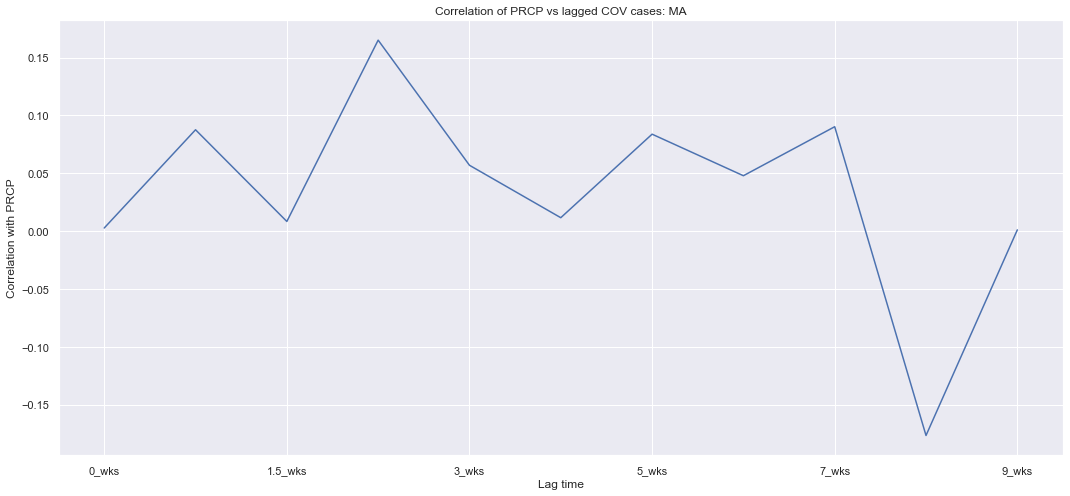

In [189]:
ma_corr.drop(columns=['MA_PRCP(mm)', 'new_case_percent_pop*'], inplace=True)
ma_corr.rename(columns={'MA_Conf_Cases': '0_wks'}, inplace=True)
ma_corr.loc['MA_PRCP(mm)', :].plot()
plt.title('Correlation of PRCP vs lagged COV cases: MA')
plt.xlabel('Lag time')
plt.ylabel('Correlation with PRCP')
plt.show()

#### Connecticut

In [190]:
df_ct4=df_ct3.copy()

In [191]:
for key, value in prcp_cov_lags.items():
    df_ct4[key] = df_ct4['CT_Conf_Cases'].shift(value, axis=0)
df_ct4 = df_ct4.drop(['CT_Avg_Temp(F)', 'day_of_week', 'day_of_year', 'Year', 'Month', 'Day'], axis =1).dropna()
ct_corr = pd.DataFrame(df_ct4.corr())
ct_corr

,CT_PRCP(mm),CT_Conf_Cases,new_case_percent_pop*,1_wk,1.5_wks,2_wks,3_wks,4_wks,5_wks,6_wks,7_wks,8_wks,9_wks
CT_PRCP(mm),1.000000,0.098041,0.098041,0.223426,0.012225,0.090438,0.005687,0.122101,0.060740,-0.147100,0.026914,0.087258,-0.022471
CT_Conf_Cases,0.098041,1.000000,1.000000,0.356899,-0.034528,0.282882,0.350118,0.232697,0.141900,0.181356,0.064120,-0.010843,0.196956
new_case_percent_pop*,0.098041,1.000000,1.000000,0.356899,-0.034528,0.282882,0.350118,0.232697,0.141900,0.181356,0.064120,-0.010843,0.196956
1_wk,0.223426,0.356899,0.356899,1.000000,-0.111738,0.332548,0.307121,0.435175,0.320518,0.256018,0.251267,0.083295,0.177778
1.5_wks,0.012225,-0.034528,-0.034528,-0.111738,1.000000,-0.207383,-0.101768,-0.173789,-0.020207,-0.050230,-0.230018,-0.338686,-0.353718
2_wks,0.090438,0.282882,0.282882,0.332548,-0.207383,1.000000,0.304034,0.299033,0.426083,0.305128,0.227706,0.183566,-0.004254
3_wks,0.005687,0.350118,0.350118,0.307121,-0.101768,0.304034,1.000000,0.312688,0.301990,0.394305,0.223213,0.173175,-0.035351
4_wks,0.122101,0.232697,0.232697,0.435175,-0.173789,0.299033,0.312688,1.000000,0.362113,0.336550,0.317270,0.146890,0.051721
5_wks,0.060740,0.141900,0.141900,0.320518,-0.020207,0.426083,0.301990,0.362113,1.000000,0.385018,0.253100,0.211246,0.055077
6_wks,-0.147100,0.181356,0.181356,0.256018,-0.050230,0.305128,0.394305,0.336550,0.385018,1.000000,0.312878,0.172559,0.026091


[]

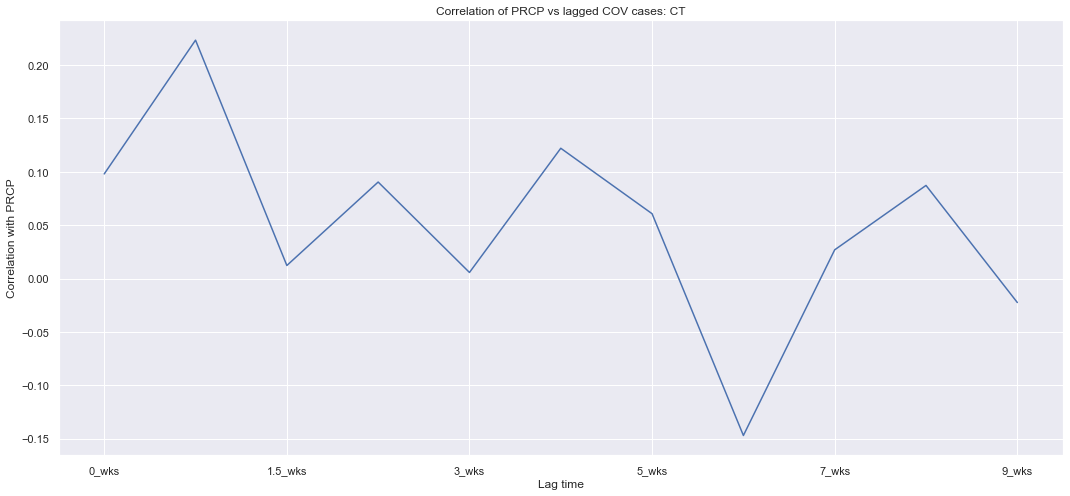

In [192]:
ct_corr.drop(columns=['CT_PRCP(mm)', 'new_case_percent_pop*'], inplace=True)
ct_corr.rename(columns={'CT_Conf_Cases': '0_wks'}, inplace=True)
ct_corr.loc['CT_PRCP(mm)', :].plot()
plt.title('Correlation of PRCP vs lagged COV cases: CT')
plt.xlabel('Lag time')
plt.ylabel('Correlation with PRCP')
plt.plot()

#### Vermont

In [193]:
df_vt4=df_vt3.copy()

In [194]:
for key, value in prcp_cov_lags.items():
    df_vt4[key] = df_vt4['VT_Conf_Cases'].shift(value, axis=0)
df_vt4 = df_vt4.drop(['VT_Avg_Temp(F)', 'day_of_week', 'day_of_year', 'Year', 'Month', 'Day'], axis =1).dropna()
vt_corr = pd.DataFrame(df_vt4.corr())
vt_corr

,VT_PRCP(mm),VT_Conf_Cases,new_case_percent_pop*,1_wk,1.5_wks,2_wks,3_wks,4_wks,5_wks,6_wks,7_wks,8_wks,9_wks
VT_PRCP(mm),1.000000,-0.020318,-0.020318,-0.020157,-0.030970,-0.003796,-0.069702,0.084303,0.111696,-0.063733,0.021526,-0.069719,-0.061464
VT_Conf_Cases,-0.020318,1.000000,1.000000,0.704268,0.375849,0.548427,0.553502,0.520194,0.484869,0.591356,0.577221,0.616894,0.272822
new_case_percent_pop*,-0.020318,1.000000,1.000000,0.704268,0.375849,0.548427,0.553502,0.520194,0.484869,0.591356,0.577221,0.616894,0.272822
1_wk,-0.020157,0.704268,0.704268,1.000000,0.365897,0.607436,0.470337,0.549759,0.404600,0.457539,0.574499,0.605601,0.340880
1.5_wks,-0.030970,0.375849,0.375849,0.365897,1.000000,0.320015,0.146790,0.013607,0.031824,0.002843,0.021223,0.105385,0.316482
2_wks,-0.003796,0.548427,0.548427,0.607436,0.320015,1.000000,0.475549,0.444647,0.445815,0.468722,0.530496,0.643924,0.303383
3_wks,-0.069702,0.553502,0.553502,0.470337,0.146790,0.475549,1.000000,0.442796,0.279937,0.383138,0.428735,0.522728,0.271562
4_wks,0.084303,0.520194,0.520194,0.549759,0.013607,0.444647,0.442796,1.000000,0.438902,0.390445,0.450638,0.499067,0.099915
5_wks,0.111696,0.484869,0.484869,0.404600,0.031824,0.445815,0.279937,0.438902,1.000000,0.449744,0.380117,0.456276,0.131636
6_wks,-0.063733,0.591356,0.591356,0.457539,0.002843,0.468722,0.383138,0.390445,0.449744,1.000000,0.621350,0.548580,0.052677


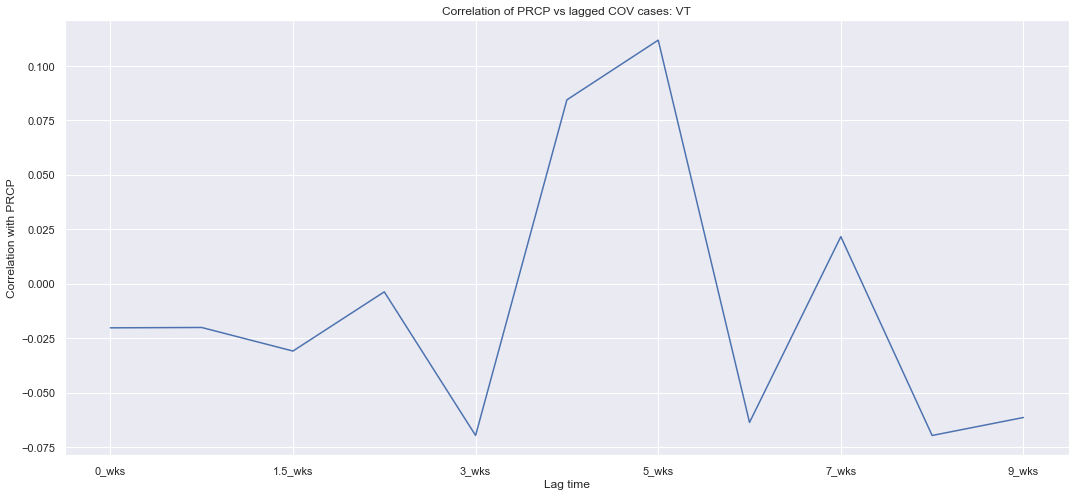

In [195]:
vt_corr.drop(columns=['VT_PRCP(mm)', 'new_case_percent_pop*'], inplace=True)
vt_corr.rename(columns={'VT_Conf_Cases': '0_wks'}, inplace=True)
vt_corr.loc['VT_PRCP(mm)', :].plot()
plt.title('Correlation of PRCP vs lagged COV cases: VT')
plt.xlabel('Lag time')
plt.ylabel('Correlation with PRCP')
plt.show()

#### Maine

In [196]:
df_me4=df_me3.copy()

In [197]:
for key, value in prcp_cov_lags.items():
    df_me4[key] = df_me4['ME_Conf_Cases'].shift(value, axis=0)
df_me4 = df_me4.drop(['ME_Avg_Temp(F)', 'day_of_week', 'day_of_year', 'Year', 'Month', 'Day'], axis =1).dropna()
me_corr = pd.DataFrame(df_me4.corr())
me_corr

,ME_PRCP(mm),ME_Conf_Cases,new_case_percent_pop*,1_wk,1.5_wks,2_wks,3_wks,4_wks,5_wks,6_wks,7_wks,8_wks,9_wks
ME_PRCP(mm),1.000000,0.287592,0.287592,0.219304,-0.063921,0.148979,0.234173,0.119338,0.126594,0.042344,-0.112127,0.179780,-0.098797
ME_Conf_Cases,0.287592,1.000000,1.000000,0.889810,0.037100,0.836258,0.770533,0.674513,0.534925,0.490358,0.408680,0.446780,0.287044
new_case_percent_pop*,0.287592,1.000000,1.000000,0.889810,0.037100,0.836258,0.770533,0.674513,0.534925,0.490358,0.408680,0.446780,0.287044
1_wk,0.219304,0.889810,0.889810,1.000000,0.007272,0.852939,0.819770,0.720338,0.630129,0.552115,0.471433,0.528214,0.279770
1.5_wks,-0.063921,0.037100,0.037100,0.007272,1.000000,-0.069197,-0.172689,-0.221574,-0.332519,-0.365443,-0.378661,-0.339311,-0.370337
2_wks,0.148979,0.836258,0.836258,0.852939,-0.069197,1.000000,0.838565,0.802551,0.702934,0.650172,0.564555,0.535904,0.467298
3_wks,0.234173,0.770533,0.770533,0.819770,-0.172689,0.838565,1.000000,0.821896,0.784063,0.712990,0.648216,0.590445,0.461278
4_wks,0.119338,0.674513,0.674513,0.720338,-0.221574,0.802551,0.821896,1.000000,0.817729,0.803258,0.698429,0.670325,0.528740
5_wks,0.126594,0.534925,0.534925,0.630129,-0.332519,0.702934,0.784063,0.817729,1.000000,0.820280,0.770886,0.711922,0.596036
6_wks,0.042344,0.490358,0.490358,0.552115,-0.365443,0.650172,0.712990,0.803258,0.820280,1.000000,0.785456,0.765916,0.596420


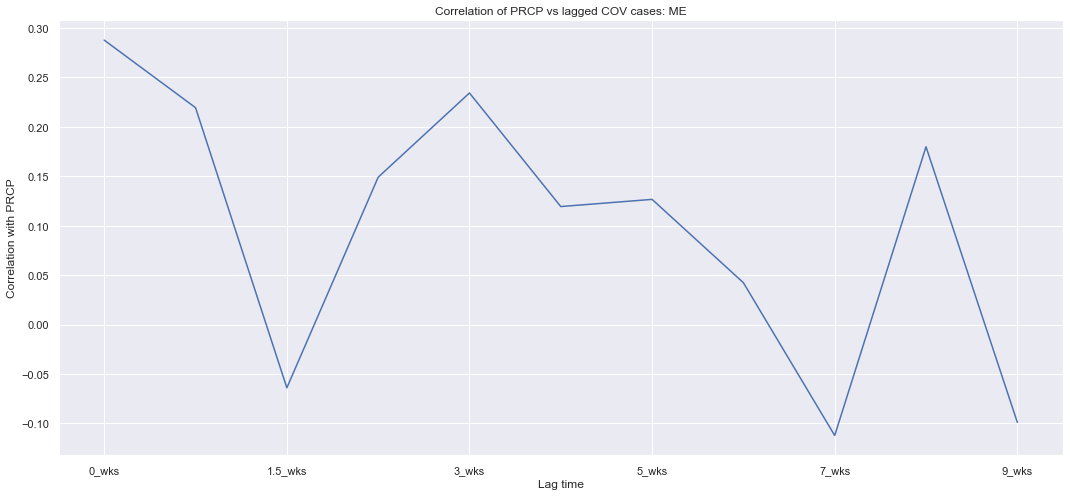

In [198]:
me_corr.drop(columns=['ME_PRCP(mm)', 'new_case_percent_pop*'], inplace=True)
me_corr.rename(columns={'ME_Conf_Cases': '0_wks'}, inplace=True)
plt.title('Correlation of PRCP vs lagged COV cases: ME')
me_corr.loc['ME_PRCP(mm)', :].plot()
plt.xlabel('Lag time')
plt.ylabel('Correlation with PRCP')
plt.show()

In [199]:
df_ma3['PRCP_lag7wks'] = df_ma3['new_case_percent_pop*'].shift(-49, axis=0)

In [200]:
df_ct3['PRCP_lag7wks'] = df_ct3['new_case_percent_pop*'].shift(-49, axis=0)

In [201]:
df_vt3['PRCP_lag7wks'] = df_vt3['new_case_percent_pop*'].shift(-49, axis=0)

In [202]:
df_me3['PRCP_lag7wks'] = df_me3['new_case_percent_pop*'].shift(-49, axis=0)

In [203]:
df_ma3.dropna(inplace=True)

In [204]:
df_ct3.dropna(inplace=True)

In [205]:
df_vt3.dropna(inplace=True)

In [206]:
df_me3.dropna(inplace=True)

In [207]:
# Create identifying state_id columns for each state df
df_ma3['state_id'] = 'MA'
df_ct3['state_id'] = 'CT'
df_vt3['state_id'] = 'VT'
df_me3['state_id'] = 'ME'

In [208]:
# Prepare df_ma3 for merge by updating column names
df_ma3.drop('MA_PRCP(mm)', axis=1, inplace=True)
ma_cols = {'MA_Avg_Temp(F)': 'Avg_Temp(F)',
           'MA_Conf_Cases' : 'Conf_Cases'}
df_ma3.rename(columns=ma_cols, inplace=True)

In [209]:
# Prepare df_ct3 for merge by updating column names
df_ct3.drop('CT_PRCP(mm)', axis=1, inplace=True)
ct_cols = {'CT_Avg_Temp(F)': 'Avg_Temp(F)',
           'CT_Conf_Cases' : 'Conf_Cases'}
df_ct3.rename(columns=ct_cols, inplace=True)

In [210]:
# Prepare df_vt3 for merge by updating column names
df_vt3.drop('VT_PRCP(mm)', axis=1, inplace=True)
vt_cols = {'VT_Avg_Temp(F)': 'Avg_Temp(F)',
           'VT_Conf_Cases' : 'Conf_Cases'}
df_vt3.rename(columns=vt_cols, inplace=True)

In [211]:
# Prepare df_me3 for merge by updating column names
df_me3.drop('ME_PRCP(mm)', axis=1, inplace=True)
me_cols = {'ME_Avg_Temp(F)': 'Avg_Temp(F)',
           'ME_Conf_Cases' : 'Conf_Cases'}
df_me3.rename(columns=me_cols, inplace=True)

In [212]:
df = pd.concat([df_ma3, df_me3, df_vt3, df_ct3], axis=0).set_index('date').reset_index()

In [213]:
df

,date,Avg_Temp(F),Conf_Cases,day_of_week,day_of_year,Year,Month,Day,new_case_percent_pop*,PRCP_lag7wks,state_id
0,2021-07-23,69.44,0.0,4,204,2021,7,23,0.000000,26.643273,MA
1,2021-07-24,66.92,424.0,5,205,2021,7,24,6.031366,24.111238,MA
2,2021-07-25,68.36,424.0,6,206,2021,7,25,6.031366,24.111238,MA
3,2021-07-26,77.54,424.0,0,207,2021,7,26,6.031366,24.111238,MA
4,2021-07-27,75.92,277.0,1,208,2021,7,27,3.940303,7.795256,MA
...,...,...,...,...,...,...,...,...,...,...,...
327,2021-10-09,60.26,491.0,5,282,2021,10,9,13.616407,21.381364,CT
328,2021-10-10,58.46,491.0,6,283,2021,10,10,13.616407,21.381364,CT
329,2021-10-11,62.42,491.0,0,284,2021,10,11,13.616407,21.381364,CT
330,2021-10-12,59.36,491.0,1,285,2021,10,12,13.616407,8.375061,CT


In [214]:
df.dtypes

date                     datetime64[ns]
Avg_Temp(F)                     float64
Conf_Cases                      float64
day_of_week                       int64
day_of_year                       int64
Year                              int64
Month                             int64
Day                               int64
new_case_percent_pop*           float64
PRCP_lag7wks                    float64
state_id                         object
dtype: object

In [215]:
import pycaret
from pycaret.regression import *

In [216]:
all_ts = df['state_id'].unique()

all_results = []
#final_model = {}

for i in all_ts:
    df_subset = df[df['state_id'] == i]
    
    # initialize setup from pycaret.regression
    s = setup(df_subset, target ='new_case_percent_pop*' , train_size = 0.8,
              data_split_shuffle = True, fold = 3,
              ignore_features = ['date', 'Conf_Cases', 'PRCP_lag7wks'],
              numeric_features = ['day_of_year', 'Year', 'Avg_Temp(F)'],
              categorical_features = ['Month', 'day_of_week'],
              silent = True, verbose = False, session_id = 123, normalize=False)
    # compare all models and select best one based on MAE
    best_model = compare_models(sort = 'R2', verbose=False)
    
    # capture the compare result grid and store best model in list
    p = pull().iloc[0:1]
    p['time_series'] = str(i)
    all_results.append(p)
best = compare_models(sort = 'R2')
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3.3572,25.4080,4.8638,0.4396,0.4148,0.2913,0.0067
huber,Huber Regressor,3.5253,26.3613,4.9428,0.4229,0.4330,0.3178,0.0133
lr,Linear Regression,3.4197,26.4421,5.0194,0.3948,0.4447,0.2910,0.0067
lar,Least Angle Regression,3.4197,26.4421,5.0194,0.3948,0.4447,0.2910,0.0100
ada,AdaBoost Regressor,3.9467,34.2858,5.7284,0.2078,0.4611,0.3529,0.0233
rf,Random Forest Regressor,3.7236,33.0892,5.6914,0.1727,0.4220,0.3105,0.0733
catboost,CatBoost Regressor,3.9924,34.2567,5.7914,0.1584,0.4586,0.3358,0.1733
en,Elastic Net,4.4214,36.5378,5.9167,0.1518,0.4867,0.4388,0.0100
omp,Orthogonal Matching Pursuit,4.2033,37.3285,5.9650,0.1448,0.4937,0.3726,0.0067
lasso,Lasso Regression,4.5010,38.0262,6.0472,0.1101,0.4972,0.4533,0.0067


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=123, solver='auto', tol=0.001)

In [ ]:
#one-hot-encode data
one_hot_encoded_data = pd.get_dummies(df, columns = ['state_id'])

In [ ]:
#one-hot-encode data
one_hot_encoded_data3 = pd.get_dummies(df, columns = ['state_id', 'Month', 'day_of_week'])

In [ ]:
#one_hot_encoded_data.to_csv('ohe_data.csv')

In [ ]:
one_hot_encoded_data3.to_csv('prcp_lag_TEST.csv')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae, SCORERS
from sklearn.dummy import DummyRegressor
from catboost import Pool, CatBoostRegressor, cv
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import VotingRegressor

In [ ]:
# Create the base estimators
# RandomForestRegressor
rf_reg = RandomForestRegressor(bootstrap = True,
                             max_depth = 120,
                             max_features = 'auto',
                             min_samples_leaf = 1,
                             min_samples_split = 2,
                             n_estimators = 300,
                             random_state=42
)

# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(n_estimators = 1200,
                             max_depth = 50,
                             bootstrap = True,
                             random_state = 42)

# CatBoostRegressor
cb_reg = CatBoostRegressor(loss_function= 'RMSE',
                           random_seed = 42,
                           verbose = False,
                           eval_metric = 'R2',
                           early_stopping_rounds = 200,
                           cat_features = [6, 5, 8, 7]
                           )

In [ ]:
# Create the Voting Classifier with the most equally weighted because all models performed similarly

reg_voting = VotingRegressor(estimators = [('rf_est', rf_reg), ('et_est', et_reg),
                                           ('cb_est', cb_reg)], weights = [0.7, 0.1, 0.2])

In [ ]:
#one-hot-encode data
one_hot_encoded_data3 = pd.get_dummies(df, columns = ['state_id', 'Month', 'day_of_week'])

In [ ]:
one_hot_encoded_data3.columns

In [ ]:
# save the data to a new csv file
one_hot_encoded_data3.to_csv('ohe_data_with_lag7_PRCP.csv')

In [ ]:
#one-hot-encode data
one_hot_encoded_data3 = pd.get_dummies(df, columns = ['state_id'])

In [ ]:
one_hot_encoded_data3

In [ ]:
'ohe_data_with_lag7_PRCP.csv'